# Knowledge Graph (KG) Dataloader with Lightning

This guide shows how to load and use a Knowledge Graph dataset with the PyTorch Lightning LightningDataModule.

To load and simulate data from the KG model, follow the steps below:

Step 1: 📦 Import the module

In [1]:
import sys
import os

# Go up to the root where `vpeleaderboard/` is located
sys.path.append(os.path.abspath("../../"))

In [2]:
from vpeleaderboard.data.src.kg.biobridge_datamodule_hetero import BioBridgeDataModule

c:\Users\hsrak\Documents\VPELeaderboard\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Step 2: ⚙️ Initialize the KGDataModule

Specify the data directories and initialize the BioBridgeDataModule:

In [3]:
# Initial
# ize with paths to PrimeKG and BioBridge datasets
dm = BioBridgeDataModule(
    primekg_dir="../../../data/primekg/",
    biobridge_dir="../../../data/biobridge_primekg/",
    batch_size=8
)


Step 3: 🧹 Prepare data

Prepare the KG data by loading and caching it:

In [4]:
# Load data, embeddings, and node/edge mappings
dm.prepare_data()

Loading PrimeKG dataset...
Loading nodes of PrimeKG dataset ...
../../../data/primekg/primekg_nodes.tsv.gz already exists. Loading the data from the local directory.
Loading edges of PrimeKG dataset ...
../../../data/primekg/primekg_edges.tsv.gz already exists. Loading the data from the local directory.
Loading data config file of BioBridgePrimeKG...
File data_config.json already exists in ../../../data/biobridge_primekg/.
Building node embeddings...
Building full triplets...
Building train-test split...


c:\Users\hsrak\Documents\VPELeaderboard\vpeleaderboard\data\src\kg\biobridge_datamodule_hetero.py:342: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  self.data["init"][(ht, rt, tt)].edge_index = torch.tensor([src_ids, dst_ids], dtype=torch.long)


✅ Cached processed data to ./biobridge_cache.pkl


Step 4: 🧠 Setup the data splits

Split the data into training, validation, and test sets:

In [5]:
# Build HeteroData and apply RandomLinkSplit
dm.setup()

✅ Cached train/val/test splits to ./biobridge_cache.pkl


Step 5: 🧪 Access the dataloaders

Now, you can retrieve the standard Lightning dataloaders:

In [6]:

print(dm.data.keys())  # Should include 'train', 'val', 'test' if setup worked


dict_keys(['init', 'train', 'val', 'test'])


Training data

In [13]:
train_loader = dm.train_dataloader()
train_batch = next(iter(train_loader))
print(train_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 440447],
    pos_edge_label=[440447],
    pos_edge_label_index=[2, 440447],
    neg_edge_label=[440447],
    neg_edge_label_index=[2, 440447],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 571],
    pos_edge_label=[571],
    pos_edge_label_index=[2, 571],
    neg_edge_label=[571],
    neg_edge_label_index=[2, 571],
  },
  (drug, enzyme, gene/

Validation data

In [14]:
val_loader = dm.val_dataloader()
val_batch = next(iter(val_loader))
print(val_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 440447],
    pos_edge_label=[62920],
    pos_edge_label_index=[2, 62920],
    neg_edge_label=[62920],
    neg_edge_label_index=[2, 62920],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 571],
    pos_edge_label=[81],
    pos_edge_label_index=[2, 81],
    neg_edge_label=[81],
    neg_edge_label_index=[2, 81],
  },
  (drug, enzyme, gene/protein)

Test data

In [15]:
test_loader = dm.test_dataloader()
test_batch = next(iter(test_loader))
print(test_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 503367],
    pos_edge_label=[125841],
    pos_edge_label_index=[2, 125841],
    neg_edge_label=[125841],
    neg_edge_label_index=[2, 125841],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 652],
    pos_edge_label=[162],
    pos_edge_label_index=[2, 162],
    neg_edge_label=[162],
    neg_edge_label_index=[2, 162],
  },
  (drug, enzyme, gene/

In [9]:
# Train edge index
print("Train Edge Index:")
print(dm.data["train"].edge_index_dict)

# Validation edge index
print("Validation Edge Index:")
print(dm.data["val"].edge_index_dict)

# Test edge index
print("Test Edge Index:")
print(dm.data["test"].edge_index_dict)


Train Edge Index:
{('gene/protein', 'ppi', 'gene/protein'): tensor([[ 1178,  4493,  2572,  ...,  1287,  5208,  6069],
        [ 2188,  4760, 11767,  ...,  4582,   157,  6265]]), ('drug', 'carrier', 'gene/protein'): tensor([[ 440,  190,  215,  ...,  122,  381,  185],
        [4293, 4293, 4293,  ..., 4293, 4706, 4706]]), ('drug', 'enzyme', 'gene/protein'): tensor([[  837,   986,   563,  ...,   875,   709,   302],
        [ 3993, 11919,  8900,  ..., 12286,  7821,  3854]]), ('drug', 'target', 'gene/protein'): tensor([[ 2333,    90,   344,  ...,  1554,  1715,  4638],
        [ 6974, 13925,  1162,  ...,   490, 16430, 14630]]), ('drug', 'transporter', 'gene/protein'): tensor([[ 1059,   257,  2033,  ...,   714,   402,   443],
        [ 8392,  8392, 10044,  ...,  4131,  4131,  4131]]), ('drug', 'contraindication', 'disease'): tensor([[ 1886,   603,   883,  ...,   914,  5727,   639],
        [ 7143, 11059,  4353,  ..., 11269,  6522,  9790]]), ('drug', 'indication', 'disease'): tensor([[ 1092,  5

In [10]:
print("📌 Available node types:")
print(dm.data["train"].node_types)

print("📌 Available edge types:")
print(dm.data["train"].edge_types)


📌 Available node types:
['biological_process', 'cellular_component', 'disease', 'drug', 'gene/protein', 'molecular_function']
📌 Available edge types:
[('gene/protein', 'ppi', 'gene/protein'), ('drug', 'carrier', 'gene/protein'), ('drug', 'enzyme', 'gene/protein'), ('drug', 'target', 'gene/protein'), ('drug', 'transporter', 'gene/protein'), ('drug', 'contraindication', 'disease'), ('drug', 'indication', 'disease'), ('drug', 'off-label use', 'disease'), ('drug', 'synergistic interaction', 'drug'), ('gene/protein', 'associated with', 'disease'), ('disease', 'parent-child', 'disease'), ('biological_process', 'parent-child', 'biological_process'), ('molecular_function', 'parent-child', 'molecular_function'), ('cellular_component', 'parent-child', 'cellular_component'), ('gene/protein', 'interacts with', 'molecular_function'), ('gene/protein', 'interacts with', 'cellular_component'), ('gene/protein', 'interacts with', 'biological_process'), ('gene/protein', 'carrier', 'drug'), ('gene/protein

Step 6: 🕸️ Visualize a Subgraph of the Knowledge Graph

This step helps you visualize a local neighborhood around a randomly selected node from the KG. The graph highlights 1-hop (and optionally 2-hop) neighbors using networkx and matplotlib.

The center node is shown in red, and its connected nodes are shown in sky blue.

c:\Users\hsrak\Documents\VPELeaderboard\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


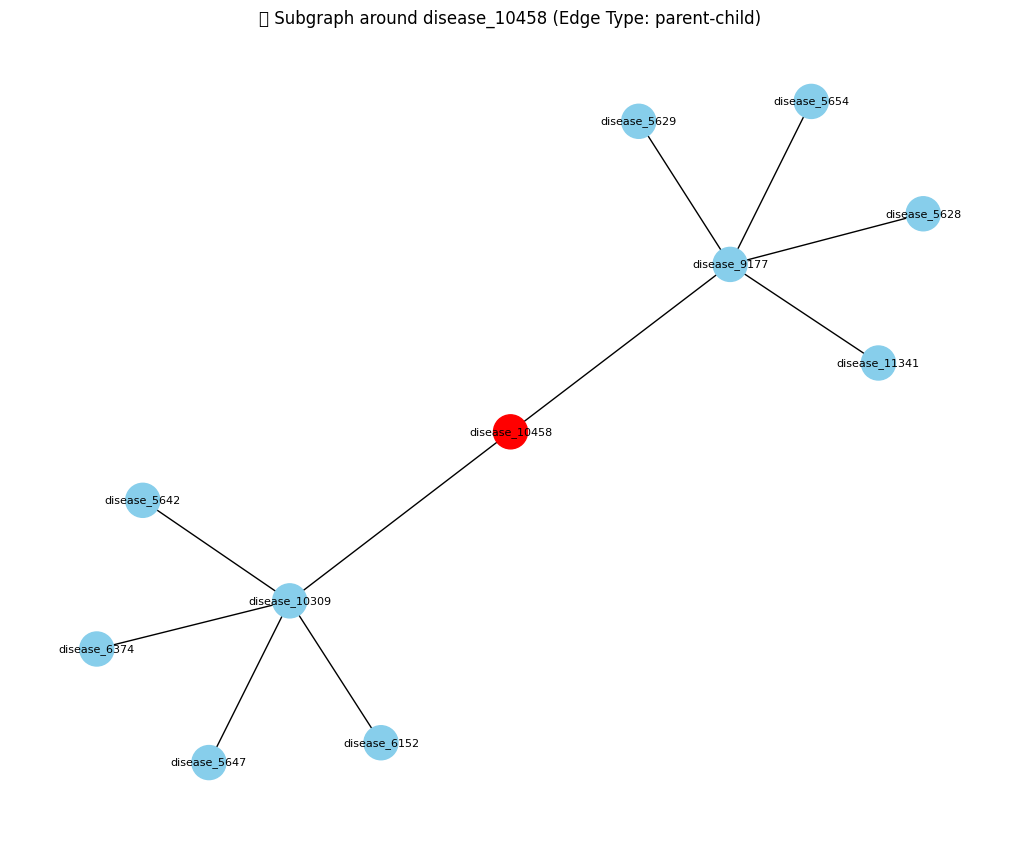

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# 1. Pick a specific edge type (you can change this to explore different relations)
edge_type = random.choice(dm.data["train"].edge_types)

# 2. Choose a node index from that edge type
edge_index = dm.data["train"][edge_type].edge_index
src_nodes = edge_index[0].tolist()
dst_nodes = edge_index[1].tolist()

# Pick one random source node
center_node_idx = random.choice(src_nodes)
center_node_label = f"{edge_type[0]}_{center_node_idx}"

# 3. Collect its 1-hop neighbors
G = nx.Graph()
neighbors = []
for src, dst in zip(src_nodes, dst_nodes):
    src_label = f"{edge_type[0]}_{src}"
    dst_label = f"{edge_type[2]}_{dst}"
    if src == center_node_idx:
        G.add_edge(src_label, dst_label)
        neighbors.append(dst_label)

# 4. Optionally, include 2-hop neighbors
for edge in zip(src_nodes, dst_nodes):
    src_label = f"{edge_type[0]}_{edge[0]}"
    dst_label = f"{edge_type[2]}_{edge[1]}"
    if src_label in neighbors:
        G.add_edge(src_label, dst_label)

# 5. Assign node colors
node_colors = []
for node in G.nodes():
    node_type = node.split("_")[0]
    if node == center_node_label:
        node_colors.append("red")  # Highlight the center node
    else:
        node_colors.append("skyblue")

# 6. Plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=600, font_size=8)
plt.title(f"🔎 Subgraph around {center_node_label} (Edge Type: {edge_type[1]})")
plt.show()


c:\Users\hsrak\Documents\VPELeaderboard\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


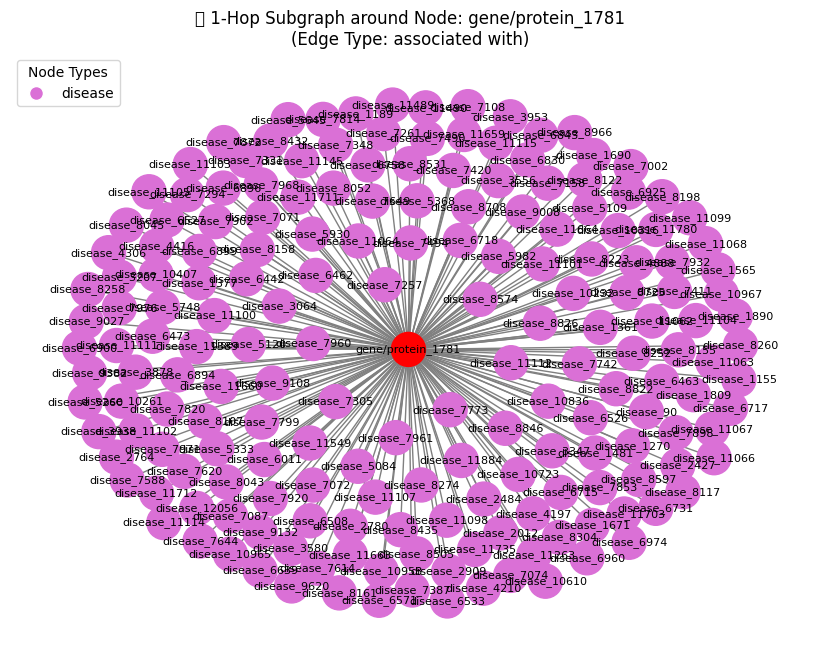

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict

# 1. Scan all edge types to find a center node with diverse neighbor types
diverse_node_found = False
max_trials = 100  # Avoid infinite loops

for _ in range(max_trials):
    edge_type = random.choice(dm.data["train"].edge_types)
    edge_index = dm.data["train"][edge_type].edge_index
    src_nodes = edge_index[0].tolist()
    dst_nodes = edge_index[1].tolist()

    candidate = random.choice(src_nodes)
    center_label = f"{edge_type[0]}_{candidate}"
    
    neighbor_types = set()
    neighbors = []

    for src, dst in zip(src_nodes, dst_nodes):
        if src == candidate:
            dst_label = f"{edge_type[2]}_{dst}"
            neighbor_type = dst_label.split("_")[0]
            neighbor_types.add(neighbor_type)
            neighbors.append(dst_label)

    if {"drug", "disease", "biological_process"}.intersection(neighbor_types):
        diverse_node_found = True
        break

if not diverse_node_found:
    raise RuntimeError("Couldn't find a node with diverse neighbors after many tries.")

# 2. Build 1-hop subgraph
G = nx.Graph()
for dst_label in neighbors:
    G.add_edge(center_label, dst_label)

# 3. Assign node colors
color_map = {
    "gene/protein": "skyblue",
    "Gene": "deepskyblue",
    "drug": "hotpink",
    "disease": "orchid",
    "biological_process": "lightgray",
    "cellular_component": "khaki",
    "molecular_function": "lightgreen",
}
node_colors = []
legend_labels = {}

for node in G.nodes():
    if node == center_label:
        node_colors.append("red")
    else:
        node_type = node.split("_")[0]
        color = color_map.get(node_type, "gray")
        node_colors.append(color)
        legend_labels[node_type] = color

# 4. Draw graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=600,
    font_size=8,
    edge_color="gray"
)

# 5. Add legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=ntype,
                             markerfacecolor=color, markersize=10)
                  for ntype, color in legend_labels.items()]
plt.legend(handles=legend_handles, title="Node Types", loc="upper left")

plt.title(f"🎯 1-Hop Subgraph around Node: {center_label}\n(Edge Type: {edge_type[1]})")
plt.show()
